In [1]:
import scanpy as sc
import os
import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# import dask.array as da

genes = ['CCL21', 'SLC9A3','SPP1',"IL18","NBAS","SLC9A3","TIMP2","IGFBP7",
              "SUGP1","MMP9","ITGAM","TFF3","B2M","S100A6","IL10",'IL6',"CXCL8",
              "LCN2","HAVCR1","CST3","CCL2","FABP1"]
cell_types = [
    "endothelial cell", "epithelial cell of proximal tubule",
    "kidney collecting duct intercalated cell", "kidney collecting duct principal cell",
    "kidney connecting tubule epithelial cell", "kidney distal convoluted tubule epithelial cell",
    "kidney interstitial fibroblast", "kidney loop of Henle thick ascending limb epithelial cell",
    "kidney loop of Henle thin ascending limb epithelial cell", "kidney loop of Henle thin descending limb epithelial cell",
    "leukocyte", "neural cell", "papillary tips cell", "parietal epithelial cell",
    "podocyte", "renal interstitial pericyte","Schwann cell"
]
os.makedirs('HubMap-filtered-data', exist_ok=True)


In [2]:
adata = sc.read_h5ad('hubmap-LK-processed.h5ad', backed='r')

In [ ]:
if "Schwann cell" in adata.obs["predicted_label"].unique():
    print("Schwann cell is present")




Schwann dcell is present


In [3]:
cell_mask = adata.obs['predicted_label'].isin(cell_types)
filtered_adata = adata[cell_mask].to_memory()

In [4]:
filtered_adata.write("HubMap-filtered-data/filtered-HubMap-LK-celltype-only.h5ad")

In [32]:
cellFilteredData = sc.read_h5ad('HubMap-filtered-data/filtered-HubMap-LK-celltype-only.h5ad', backed='r')

In [34]:
gene_mask = cellFilteredData[:, cellFilteredData.var['hugo_symbol'].isin(genes)] 

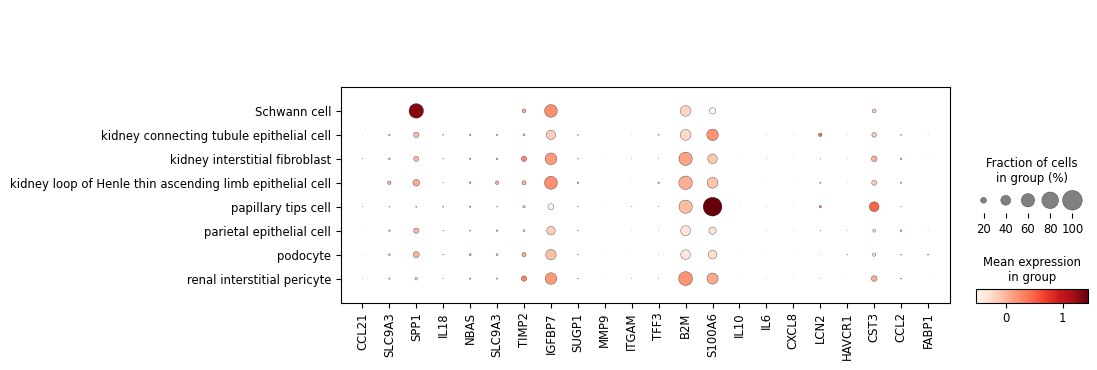

In [35]:
sc.pl.dotplot(gene_mask, genes, groupby='predicted_label', gene_symbols='hugo_symbol', show=True)
plt.show()

In [25]:
existing_cell_types = set(gene_mask.obs['predicted_label'].unique())
missing_cell_types = [cell for cell in cell_types if cell not in existing_cell_types]

if missing_cell_types:
    print("The following cell types are missing from adata:")
    for cell in missing_cell_types:
        print(cell)
else:
    print("All cell types exist in adata.")

The following cell types are missing from adata:
endothelial cell
epithelial cell of proximal tubule
kidney collecting duct intercalated cell
kidney collecting duct principal cell
kidney distal convoluted tubule epithelial cell
kidney loop of Henle thick ascending limb epithelial cell
kidney loop of Henle thin descending limb epithelial cell
leukocyte
neural cell
Schwann cell


In [29]:
adata1 = sc.read_h5ad('hubmap-RK-processed.h5ad', backed='r')
cell_mask1 = adata1.obs['predicted_label'].isin(cell_types)
filtered_adata1 = adata1[cell_mask1].to_memory()

In [30]:
filtered_adata1.write("HubMap-filtered-data/filtered-HubMap-RK-celltype-only.h5ad")

In [31]:
cellFilteredData1 = sc.read_h5ad('HubMap-filtered-data/filtered-HubMap-RK-celltype-only.h5ad', backed='r')
gene_mask1 = cellFilteredData1[:, cellFilteredData1.var['hugo_symbol'].isin(genes)]


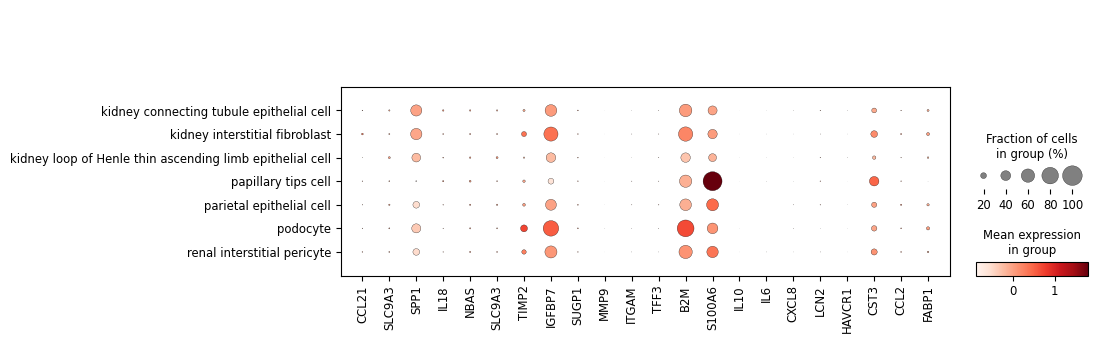

In [32]:
sc.pl.dotplot(gene_mask1, genes, groupby='predicted_label', gene_symbols='hugo_symbol', show=True)
plt.show()

In [33]:
existing_cell_types = set(gene_mask1.obs['predicted_label'].unique())
missing_cell_types = [cell for cell in cell_types if cell not in existing_cell_types]

if missing_cell_types:
    print("The following cell types are missing from adata:")
    for cell in missing_cell_types:
        print(cell)
else:
    print("All cell types exist in adata.")

The following cell types are missing from adata:
endothelial cell
epithelial cell of proximal tubule
kidney collecting duct intercalated cell
kidney collecting duct principal cell
kidney distal convoluted tubule epithelial cell
kidney loop of Henle thick ascending limb epithelial cell
kidney loop of Henle thin descending limb epithelial cell
leukocyte
neural cell


In [ ]:
adata3 = sc.read_h5ad('hubmap-LK-processed.h5ad', backed='r')

In [49]:
def gene_and_cell_checker(params):
 schwann_cells = adata.obs[params['cell']['label']] == params['cell']['cell']
 schwann_cells_data=adata[schwann_cells].to_memory()
 SSP1_schwann_cells = schwann_cells_data[:, schwann_cells_data.var[params['gene']['label']]==params['gene']['gene']]
 print(SSP1_schwann_cells.obs[params["var"]].unique)

In [ ]:
params_for_func={
 'cell':{
  'label':'cause_of_death',
  'cell':'Anoxia'
  },
  'gene':{
   'label':'hugo_symbol',
   'gene':'SPP1'
  },
  'var':'predicted_label'
}
gene_and_cell_checker(params_for_func)